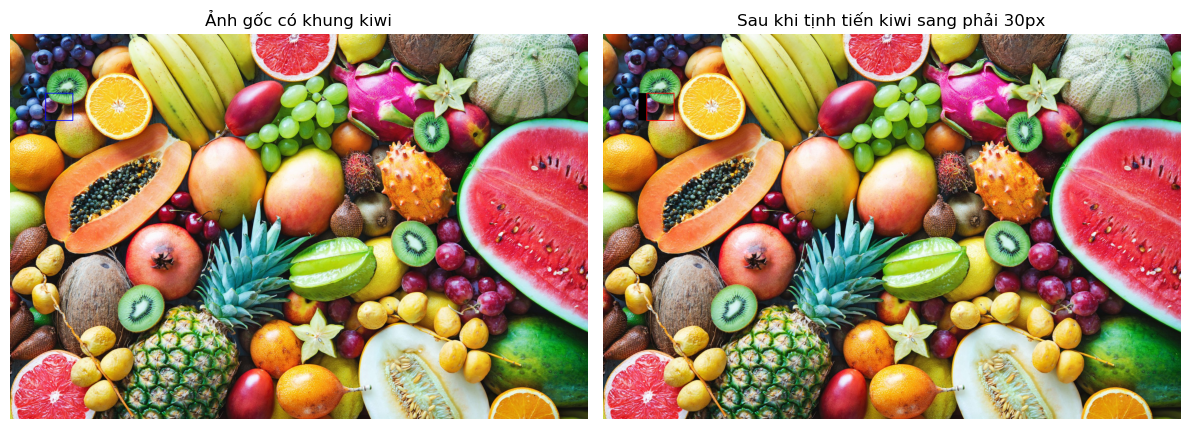

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('exercise/colorful-ripe-tropical-fruits.jpg')
if img is None:
    print("❌ Không đọc được ảnh.")
    exit()

# Xác định vùng kiwi (theo ảnh bạn gửi)
x, y, w, h = 130, 220, 100, 100

# Cắt kiwi
kiwi = img[y:y+h, x:x+w].copy()

# Xóa kiwi cũ (đặt màu đen để dễ thấy thay đổi)
img_no_kiwi = img.copy()
img_no_kiwi[y:y+h, x:x+w] = 0

# Tịnh tiến sang phải 30 pixels
new_x = x + 30
img_no_kiwi[y:y+h, new_x:new_x+w] = kiwi

# Vẽ khung để bạn dễ nhìn rõ vùng kiwi
cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)          # Khung xanh vùng gốc
cv2.rectangle(img_no_kiwi, (new_x, y), (new_x+w, y+h), (0, 0, 255), 2)  # Khung đỏ vùng mới

# Hiển thị kết quả
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Ảnh gốc có khung kiwi')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(img_no_kiwi, cv2.COLOR_BGR2RGB))
axs[1].set_title('Sau khi tịnh tiến kiwi sang phải 30px')
axs[1].axis('off')

plt.tight_layout()
plt.show()


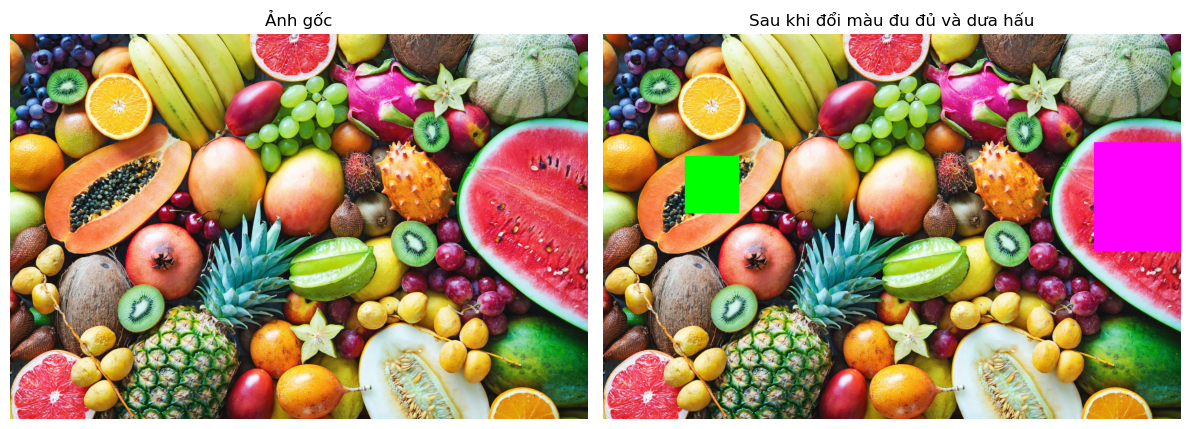

In [63]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('exercise/colorful-ripe-tropical-fruits.jpg')
if img is None:
    print("❌ Không đọc được ảnh.")
    exit()

# Tọa độ chính xác hơn
# Đu đủ
x1, y1, w1, h1 = 300, 450, 200, 210
# Dưa hấu
x2, y2, w2, h2 = 1800, 400, 600, 400

# Tạo bản sao để chỉnh sửa
img_edit = img.copy()

# Đổi màu đu đủ thành xanh lá
img_edit[y1:y1+h1, x1:x1+w1] = [0, 255, 0]  # BGR

# Đổi màu dưa hấu thành tím
img_edit[y2:y2+h2, x2:x2+w2] = [255, 0, 255]  # BGR

# Hiển thị ảnh gốc và ảnh đã chỉnh sửa
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Ảnh gốc')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(img_edit, cv2.COLOR_BGR2RGB))
axs[1].set_title('Sau khi đổi màu đu đủ và dưa hấu')
axs[1].axis('off')

plt.tight_layout()
plt.show()


✅ Đã lưu ảnh sau khi xoay 2 vùng ngẫu nhiên tại: exercise/fruits_rotated.jpg


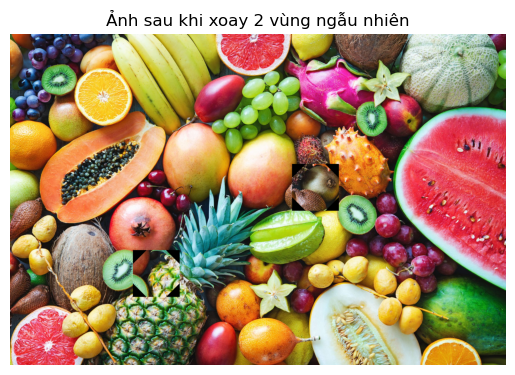

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Đường dẫn ảnh và thư mục
image_path = 'exercise/colorful-ripe-tropical-fruits.jpg'
save_path = 'exercise/fruits_rotated.jpg'
os.makedirs('exercise', exist_ok=True)

# Đọc ảnh
img = cv2.imread(image_path)
if img is None:
    print(f"❌ Không tìm thấy ảnh tại: {image_path}")
    exit()

clone = img.copy()
height, width = img.shape[:2]

# Cấu hình vùng chọn
roi_width = 200
roi_height = 200

# Chọn 2 vùng ngẫu nhiên, đảm bảo không vượt quá giới hạn ảnh
rois = []
for _ in range(2):
    x = random.randint(0, width - roi_width)
    y = random.randint(0, height - roi_height)
    rois.append((x, y, roi_width, roi_height))

# Xử lý: xoay và chèn lại
result = clone.copy()
for idx, (x, y, w, h) in enumerate(rois):
    roi = clone[y:y+h, x:x+w]

    # Xoay 45 độ quanh tâm
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, 45, 1.0)
    rotated = cv2.warpAffine(roi, M, (w, h), borderValue=(0, 0, 0))

    # Chèn lại vào ảnh kết quả
    result[y:y+h, x:x+w] = rotated

    # (Tùy chọn) lưu từng vùng riêng
    cv2.imwrite(f"exercise/rotated_random_roi_{idx+1}.jpg", rotated)

# Lưu ảnh kết quả cuối cùng
cv2.imwrite(save_path, result)
print(f"✅ Đã lưu ảnh sau khi xoay 2 vùng ngẫu nhiên tại: {save_path}")

# Hiển thị kết quả bằng matplotlib
img_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Ảnh sau khi xoay 2 vùng ngẫu nhiên")
plt.axis("off")
plt.show()


✅ Đã lưu ảnh trái cây được phóng to tại: exercise/fruit_scaled.jpg


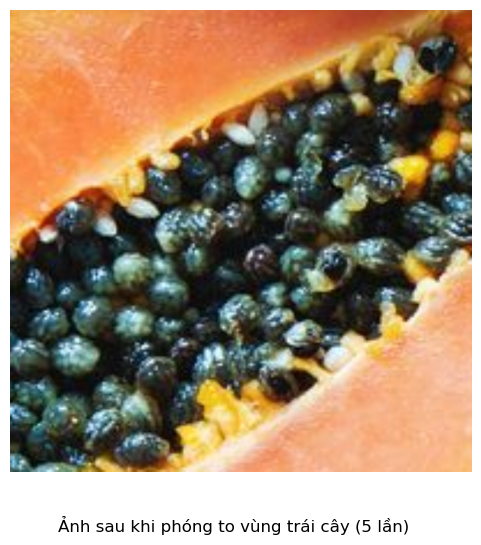

In [5]:
import cv2
import os
import matplotlib.pyplot as plt

# Đường dẫn và thư mục
image_path = 'exercise/colorful-ripe-tropical-fruits.jpg'
output_path = 'exercise/fruit_scaled.jpg'
os.makedirs('exercise', exist_ok=True)

# Đọc ảnh
img = cv2.imread(image_path)
if img is None:
    print("❌ Không tìm thấy ảnh tại:", image_path)
    exit()

# ✅ Tọa độ ví dụ: vùng trái cây cần phóng to (ví dụ quả đu đủ)
x, y, w, h = 300, 450, 200, 200  # Bạn có thể điều chỉnh toạ độ này

# Cắt vùng trái cây
fruit_roi = img[y:y+h, x:x+w]

# Phóng to 5 lần
fruit_scaled = cv2.resize(fruit_roi, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)

# Lưu ảnh kết quả
cv2.imwrite(output_path, fruit_scaled)
print(f"✅ Đã lưu ảnh trái cây được phóng to tại: {output_path}")

# ✅ Hiển thị ảnh bằng matplotlib với chú thích phía dưới
img_rgb = cv2.cvtColor(fruit_scaled, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.figtext(0.5, 0.01, "Ảnh sau khi phóng to vùng trái cây (5 lần)", 
            wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Danh sách ảnh mẫu (chỉ chọn những ảnh thật sự tồn tại)
image_files = [
    'exercise/colorful-ripe-tropical-fruits.jpg',
    'exercise/img2.jpg',
    'exercise/img3.jpg'
]
image_files = [img for img in image_files if os.path.exists(img)]

if not image_files:
    print("❌ Không có ảnh nào hợp lệ trong thư mục 'exercise'.")
    exit()

# Danh sách các phép biến đổi
transform_names = {
    'T': 'Tịnh tiến',
    'X': 'Xoay',
    'P': 'Phóng to',
    'H': 'Thu nhỏ',
    'C': 'Lật ngang'
}

# In menu
print("Chọn phép biến đổi:")
for key, name in transform_names.items():
    print(f"  {key} - {name}")

choice = input("Nhập ký tự phép biến đổi (T/X/P/H/C): ").strip().upper()
if choice not in transform_names:
    print("❌ Phép biến đổi không hợp lệ.")
    exit()

# Danh sách ảnh hiển thị cho người dùng chọn
print("\nChọn ảnh để thực hiện biến đổi:")
for i, path in enumerate(image_files):
    print(f"  {i+1}: {path}")

try:
    img_index = int(input("Nhập số thứ tự ảnh (1/2/3): ")) - 1
    if img_index not in range(len(image_files)):
        raise ValueError
except:
    print("❌ Lựa chọn ảnh không hợp lệ.")
    exit()

img_path = image_files[img_index]
img = cv2.imread(img_path)
if img is None:
    print("❌ Không đọc được ảnh:", img_path)
    exit()

h, w = img.shape[:2]

# Thực hiện biến đổi theo lựa chọn
if choice == 'T':  # Tịnh tiến
    dx, dy = 100, 50
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    transformed = cv2.warpAffine(img, M, (w, h))

elif choice == 'X':  # Xoay
    center = (w // 2, h // 2)
    angle = 45
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    transformed = cv2.warpAffine(img, M, (w, h))

elif choice == 'P':  # Phóng to
    scale = 1.5
    transformed = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

elif choice == 'H':  # Thu nhỏ
    scale = 0.5
    transformed = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

elif choice == 'C':  # Lật ngang
    transformed = cv2.flip(img, 1)

# Hiển thị ảnh gốc và ảnh sau biến đổi
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title(f"Biến đổi: {transform_names[choice]}")
plt.axis("off")

plt.figtext(0.5, 0.01, f"Phép biến đổi: {transform_names[choice]}\nẢnh: {os.path.basename(img_path)}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Lưu kết quả
output_path = f'exercise/output_{choice}.jpg'
cv2.imwrite(output_path, transformed)
print(f"✅ Đã lưu ảnh kết quả tại: {output_path}")

Chọn phép biến đổi:
  T - Tịnh tiến
  X - Xoay
  P - Phóng to
  H - Thu nhỏ
  C - Lật ngang
❌ Phép biến đổi không hợp lệ.

Chọn ảnh để thực hiện biến đổi:
  1: exercise/colorful-ripe-tropical-fruits.jpg


NameError: name 'transformed' is not defined

: 